<a href="https://colab.research.google.com/github/AlexMa123/BIU_ComplexSystem_private/blob/main/Lecture%203%20-%20Percolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percolation

## Review

Percolation is the study of connectivity of random media and of other properties of connected subsets of random media. The study of percolation has brought new understanding and techniques to a broad range of topics in physics, materials science, complex networks, epidemiology, and other fields.

|![example of percolation](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Manual_coffee_preperation.jpg/1024px-Manual_coffee_preperation.jpg)|
|:-:|
|*Fig1.1: a) Examples of percolation: In coffee percolation, soluble compounds leave the coffee grounds and join the water to form coffee. Insoluble compounds (and granulates) remain within the coffee filter.*|

### Site percolation
Let's study the simplest example of a random medium. Generate an L  ×  L matrix where each element is occupied with probability p. Assume the occupied sites are considered to be holes in the porous material.

In [9]:
import numpy as np

(np.random.rand(5, 5) < 0).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

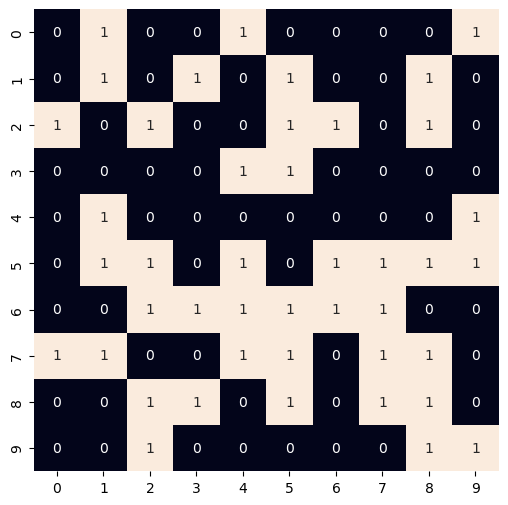

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for plot heatmap

p = 0.4 # occupation probability
# generate a matrix filled with random numbers uniformly distributed between 0 to 1
random_matrix = np.random.rand(10, 10)
# if the element in random_matrix smaller than p, set it as True, otherwise, equal to False
m = random_matrix < p
# change True to 1, False to 0
m = m.astype(int)
plt.figure(figsize=(6, 6))
sns.heatmap(m, annot=m, cbar=False)
plt.show()

### Label clusters
Once we have this material (matrix), we can start to study the connectivity between the holes (sites). The two sites are connected if they are nearest neighbors (4 neighbors on a square lattice), and the set of connected sites is a cluster. If the cluster spans from the top to the bottom, it is called an infinity cluster. **The system is percolating if there is an infinity cluster in the system.**

To determine the clusters in a matrix, we can use the `Hoshen-Kopelman-Algorithm`, and luckily, there is a build-in function in scipy to find out the clusters

In [18]:
m

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]])

In [20]:
labeled_m, num_c = ndimage.label(m)

In [21]:
labeled_m

array([[ 0,  1,  0,  0,  2,  0,  0,  0,  0,  3],
       [ 0,  1,  0,  4,  0,  5,  0,  0,  6,  0],
       [ 7,  0,  8,  0,  0,  5,  5,  0,  6,  0],
       [ 0,  0,  0,  0,  5,  5,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  9],
       [ 0,  9,  9,  0,  9,  0,  9,  9,  9,  9],
       [ 0,  0,  9,  9,  9,  9,  9,  9,  0,  0],
       [10, 10,  0,  0,  9,  9,  0,  9,  9,  0],
       [ 0,  0, 11, 11,  0,  9,  0,  9,  9,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  9,  9]])

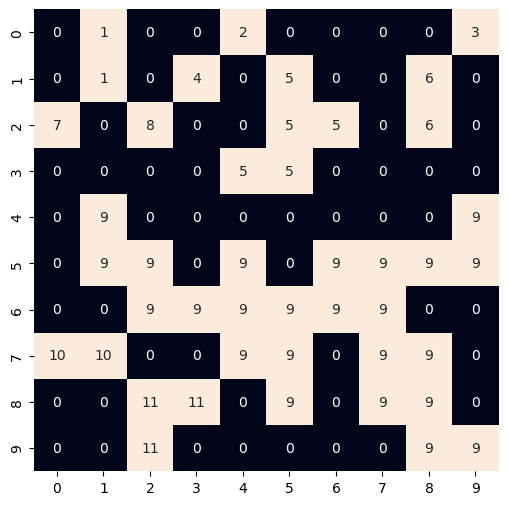

In [22]:
import scipy.ndimage as ndimage
# lm: labeled matrix, num: number of clusters in the given system
# one can also use the parameter structure in the function, label, to specify the connectivity
lm, num = ndimage.label(m)
plt.figure(figsize=(6, 6))
sns.heatmap(m, annot=lm, cbar=False)
plt.show()

### Calculate the size / mass of each cluster
We can use the function `ndimage.sum` to calculate the size of labels.

This function can sum up all the elements in a matrix that is labeled as index, just by 
```python
ndimage.sum(matrix, label, index)
```
where the matrix is the random media we prepared using np.random.rand;

label is the matrix we got using ndimage.label

and index is the label that we want to find it's mass. (could also be an array).

In [28]:
ndimage.sum(m, labeled_m, range(1, num_c + 1))

array([ 2.,  1.,  1.,  1.,  5.,  2.,  1.,  1., 24.,  2.,  3.])

In [23]:
i = 5
print(f"The size of {i}th cluster is", ndimage.sum(m, lm, index=i))

print(f"The size of the [4th, 5th, 6th, 7th] clusters is", ndimage.sum(m, lm, index=[4, 5, 6, 7]))

The size of 5th cluster is 5
The size of the [4th, 5th, 6th, 7th] clusters is [1. 5. 2. 1.]


<AxesSubplot:>

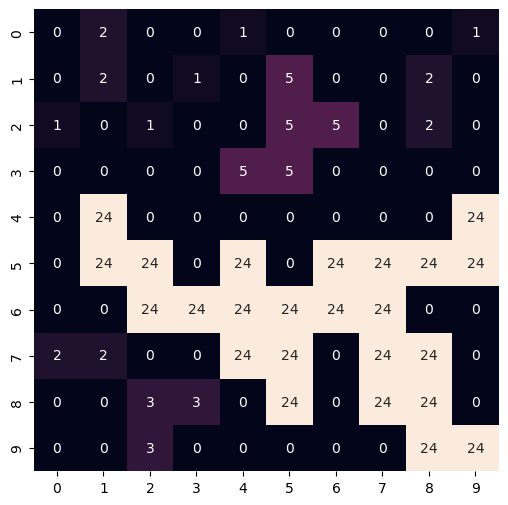

In [29]:
size = ndimage.sum(m, lm, index=range(num+1))
sizeImg = size[lm]
plt.figure(figsize=(6, 6))
sns.heatmap(sizeImg, annot=sizeImg, cbar=False)

Let's look at the clusters under different occupation probability

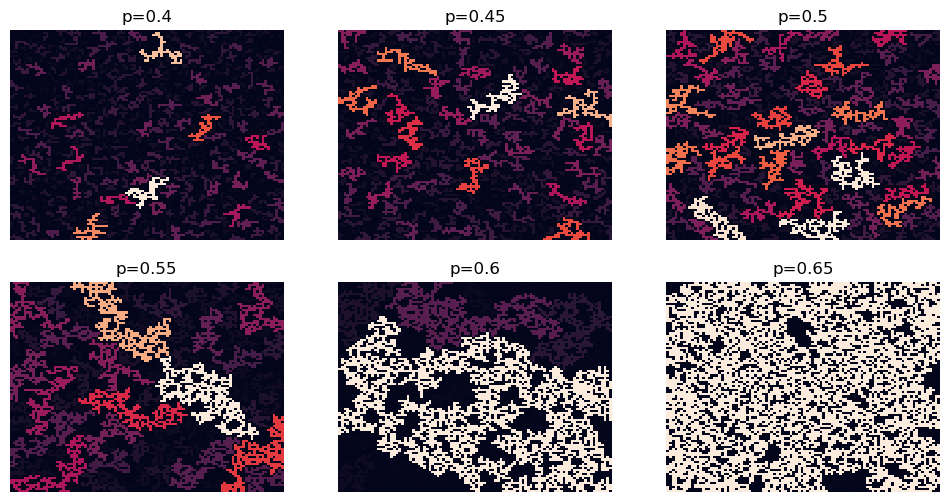

In [31]:
L = 100
ps = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
plt.figure(figsize=(12, 6))
for i in range(len(ps)):
    p = ps[i]
    m = (np.random.rand(L, L) < p).astype(int)
    lm, num = ndimage.label(m)
    area = ndimage.sum(m, lm, index=range(num+1))
    plt.subplot(2, 3, i+1)
    sns.heatmap(area[lm], cbar=False)
    plt.title(f"p={p}")
    plt.axis('off')


Clearly, there are two different phases (or states): one phase with an infinity cluster (large p) and another phase without an infinity cluster (small p)

### Order Parameter
An order parameter distinguishes the two different phases (or orders). In one phase the order parameter is zero and in another phase it is non-zero. In such a way, we can have one ordered phase and one disordered phase.

For percolation, we can choose the probability that one site belongs to the infinity cluster, $P_{\infty}(p)$ as the order parameter. When p is smaller than the critical probability $p_c$, there is no infinity cluster, $P_{\infty}=0$, and when p is larger than $p_c$, $P_{\infty}$ will be non-zero

### Check whether the system has an infinity cluster or not. 

In [34]:
p = 0.7
L = 100
# generate random matrix and label clusters
m = (np.random.rand(L, L) < p).astype(int)

lm, num = ndimage.label(m)
# findout whether the first and last row have the same cluster

perc_x = np.intersect1d(lm[0], lm[-1])
perc_x.max() > 0

True

In [ ]:
?np.intersect1d

Signature: np.intersect1d(ar1, ar2, assume_unique=False, return_indices=False)
Docstring:
Find the intersection of two arrays.

Return the sorted, unique values that are in both of the input arrays.

Parameters
----------
ar1, ar2 : array_like
    Input arrays. Will be flattened if not already 1D.
assume_unique : bool
    If True, the input arrays are both assumed to be unique, which
    can speed up the calculation.  If True but ``ar1`` or ``ar2`` are not
    unique, incorrect results and out-of-bounds indices could result.
    Default is False.
return_indices : bool
    If True, the indices which correspond to the intersection of the two
    arrays are returned. The first instance of a value is used if there are
    multiple. Default is False.

    .. versionadded:: 1.15.0

Returns
-------
intersect1d : ndarray
    Sorted 1D array of common and unique elements.
comm1 : ndarray
    The indices of the first occurrences of the common values in `ar1`.
    Only provided if `return_indices

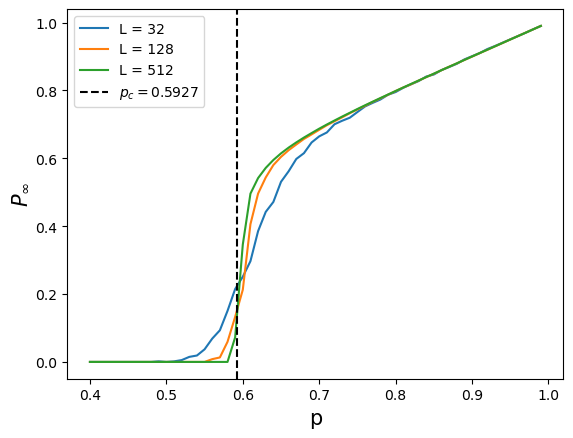

In [ ]:
def p_inf(L, p, n=100):
    area_inf = 0
    for i in range(n):
        z = np.random.rand(L, L)
        m = (z < p)
        lm, num = ndimage.label(m)
        perc_x = np.intersect1d(lm[0], lm[-1])
        if perc_x.max() > 0:
            area = ndimage.sum(m, lm, perc_x)
            area_inf = area_inf + area.sum()
    return area_inf / (n * L * L)


for l in [32, 128, 512]:
    ps = np.arange(0.4, 1, 0.01)
    pinf = np.zeros_like(ps)
    for i in range(ps.size):
        pinf[i] = p_inf(l, ps[i], n=100)

    plt.plot(ps, pinf, label=f'L = {l}')

plt.axvline(0.5927, color='k', linestyle='--', label='$p_c = 0.5927$')
plt.xlabel("p", fontsize=15)
plt.ylabel(r"$P_{\infty}$", fontsize=15)
plt.legend()

### Critical Phenomena

#### Critical exponents and universality.

As we approach the critical point, the order parameter:

$$P_{\infty}(p) \sim (p - p_c)^{\beta}$$

The average size of the finite clusters (the susceptibility, compressibility for the other systems) $S(q) = \chi (q) = \frac{1}{N} \sum s_k^2$:

$$ \chi(q) \sim |p-p_c|^{-\gamma}$$

And the correlation length
$$\xi(p) \sim |p - p_c| ^ {-\nu}$$

show a power law diverge or converge. These exponents are called `critical exponents` and are robust observables. Even more, they could take the same values for very different physical systems. This intriguing phenomenon is called `universality`.

#### Divergences at the critical point.
At the critical point, the correlation length $\xi \rightarrow \infty$

#### Critical slowing down
When a system is approaching a critical transition, it will wait longer to return to equilibrium after perturbations, indicated by an increase in signal variance and autocorrelation

## Renormalization group

Renormalization group is a mathematical tools to study the critical points, which takes advantage of the self-similarity to explain universality and predict numerically the critical exponents.

In theoretical physics, the term renormalization group (RG) refers to a formal apparatus that allows systematic investigation of the changes of a physical system as viewed at different scales.

The real space renormalisation is based on the so-called block site (spin) technique introduced by Leo Kadanoff.

The renormalisation group method has three basis steps:
1. Divide the lattice into blocks of linear size b with each block containing a few sites (spin)
2. Replace each block of sites by a single block site of size b which is occupied with probability $R_b(p)$ according to the renormalisation group transformation.
3. Restore original lattice constant by rescaling the length scales by the factor b.


|![example of renormalisation](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/renormalisation.png?raw=true)|
|:-:|
|*Real-space renormalisation group transformation fo two-dimensional site percolation on a square lattice with sites of size a. Sites are occupied with probability p. (a) The lattice is divided into blocks of size ba, each containing $b^2$ sites. {b) Each block is coarse grained and all of its sites are replaced by a single block site of size ba occupied with probability $R_b(p)$. {c) All length scales are reduced by the factor b. The block size is thereby reduced to a, the same size as the sites in the original lattice: block sites become sites. We therefore obtain a rescaled version of the original lattice where, because of coarsening, sites are occupied with probability R_b(p).*|

#### Renormalisation in 2d square lattice
For simplify the coarse graining, consider b = 2. When there is a spaning cluster in one block, we occupied this block. 

|![Rb for 2d lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/renormalisation_2d_lattice.png?raw=true)|
|:-:|
|*16 different configurations of a b = 2 block containing 4 sites for 2d site percolation on a square lattice. the left configurations have a vertically spanning cluster and by adding the probabilities for each configuration, we can find $R_b(p)$*|


So $R_b(p) = 2 p ^ 2 - p^4$

It means, after the rescaling, the new figure is equvalent to a percolation system with an occupation probability $R_b(p)$. The systems generate under the $p^*$ that make $R_b(p^*) = p^*$ are the scale-invarance systems. We can find 3 fixed points: $0, (\sqrt{5} - 1) / 2$ and $1$. 0 and 1 are two trivial states, which are just the state are occupied or not occupied. $p ^ * = (\sqrt{5} - 1) / 2$ is the only non-trivial scale-invarance state.

|![Rb for 2d lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/renormalisation_different_p.png?raw=True)|
|:-:|
|*Real-space renormalisation group transformation of two-dimensional site percolation on a square lattice.*|


#### Correlation length
Let's say all the sites are occupied with probability p and the correlation length is $\xi$. Then the correlation length of the block sites occupied with probability $R_b(p)$  will be $\xi / b$.

Recall the divergence of the correlation length close to $p_c$ is characterised by the critical exponent $\nu$.

$$\xi(p) = C |p - p_c|^{-\nu}$$

So

$$\frac{\xi(p)}{b} = \frac{C |p - p_c|^{-\nu}}{b} = C |R_b(p) - p_c|^{-\nu}$$

$$\frac{|R_b(p) - p_c|^{-\nu}}{|p - p_c|^{-\nu}} = \frac{1}{b} $$

$$\nu = \frac{\log b}{\log \left( \frac{|R_b(p) - p_c|}{|p - p_c|} \right)}$$

Since $R_b(p_c) = p_c$

$$\nu = \frac{\log b}{\log \left( \frac{|R_b(p) - R_b(p_c)|}{|p - p_c|} \right)} $$

If we take the limit: $p\rightarrow p_c$, $\frac{|R_b(p) - R_b(p_c)|}{|p - p_c|} = \left. \frac{\mathrm{d} R_b}{\mathrm{d} p}\right|_{p\rightarrow p_c}$

Finally, we get
$$\nu = \frac{\log b}{\log \left( \left. \frac{\mathrm{d} R_b}{\mathrm{d} p} \right|_{p_c} \right)} $$

1. Renormalization

2. critical exponent

3. soc from a real data.